# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Fri Dec 29 04:56:01 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
list_of_areas = [
    "Self-driving Cars",
    "Sign-language detection",
    "Face-detection"
]

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
overfitting = "Overfitting means the model performs well on train data but perform worse on test data. This happens when the model becomes too specific on training data"

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
prevent_overfitting = [
    "lower learning rate",
    "increase training data quality",
    "use validation tests",
    "less complex models"
]

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
"""
I uploaded an image of sports car but it was unable to distinguish it from lifeboat
"""

'\nI uploaded an image of sports car but it was unable to distinguish it from lifeboat\n'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [8]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 9912422/9912422 [00:00<00:00, 128855802.50it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 108253524.42it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27921899.00it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19127036.92it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
len(train_data), len(test_data)

(60000, 10000)

In [11]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image Shape: torch.Size([1, 28, 28])
Image Shape: torch.Size([1, 28, 28])
Image Shape: torch.Size([1, 28, 28])
Image Shape: torch.Size([1, 28, 28])
Image Shape: torch.Size([1, 28, 28])


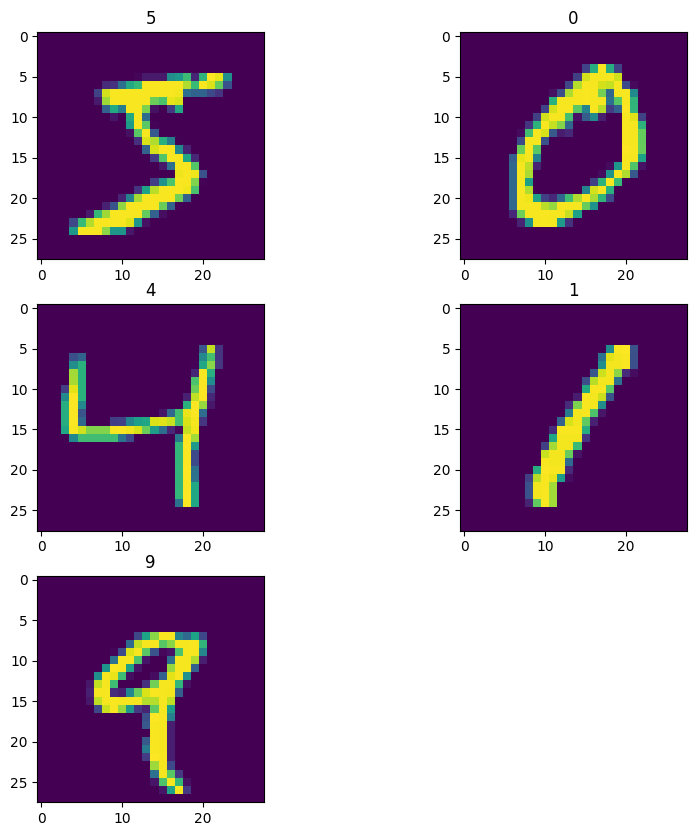

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(1, 6):
  plt.subplot(3, 2, i)
  image, label = train_data[i-1]
  print(f"Image Shape: {image.shape}")
  plt.imshow(image.squeeze())
  plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

print(f"Length of train Dataloader: {len(train_dataloader)}")
print(f"Length of test Dataloader: {len(test_dataloader)}")

Length of train Dataloader: 1875
Length of test Dataloader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [18]:
import torch.nn as nn

class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7, out_features=output_shape)
    )


  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x


In [22]:
train_data.data[0].shape

torch.Size([28, 28])

In [23]:
torch.manual_seed(42)
model = MNISTModelV0(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [28]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [30]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = device):
  total_time = end - start
  print(f"Train time on {device} : {total_time: .3f} seconds")
  return total_time

In [31]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):
  train_acc, train_loss = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.3f}%")

In [37]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      test_loss += loss_fn(y_pred, y)
      test_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  print(f"Test Loss: {test_loss: .3f} | Test Accuracy: {test_acc:.3f}%")

In [41]:
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    acc /= len(data_loader)
    loss /= len(data_loader)

  return {
      "model name": model.__class__.__name__,
      "model_loss": loss.item(),
      "model_acc": acc
  }

In [38]:
torch.manual_seed(42)
from tqdm.auto import tqdm

train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n ---------------")
  train_step(
      data_loader=train_dataloader,
      model=model,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      optimizer=optimizer,
      device="cpu",
  )
  test_step(
      data_loader=test_dataloader,
      model=model,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device="cpu"
  )

train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
 ---------------
Train Loss: 0.083 | Train Accuracy: 97.440%
Test Loss:  0.052 | Test Accuracy: 98.303%
Train time on cpu :  59.723 seconds
Epoch: 1
 ---------------
Train Loss: 0.064 | Train Accuracy: 98.005%
Test Loss:  0.059 | Test Accuracy: 98.023%
Train time on cpu :  119.947 seconds
Epoch: 2
 ---------------
Train Loss: 0.054 | Train Accuracy: 98.330%
Test Loss:  0.052 | Test Accuracy: 98.153%
Train time on cpu :  158.210 seconds
Epoch: 3
 ---------------
Train Loss: 0.049 | Train Accuracy: 98.440%
Test Loss:  0.046 | Test Accuracy: 98.413%
Train time on cpu :  195.697 seconds
Epoch: 4
 ---------------
Train Loss: 0.044 | Train Accuracy: 98.598%
Test Loss:  0.045 | Test Accuracy: 98.373%
Train time on cpu :  231.532 seconds


In [39]:
train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ---------------")
  train_step(
      data_loader=train_dataloader,
      model=model,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      optimizer=optimizer,
      device=device
  )
  test_step(
      data_loader=test_dataloader,
      model=model,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_on_gpu = timer()
total_train_time_on_gpu = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
 ---------------
Train Loss: 0.040 | Train Accuracy: 98.725%
Test Loss:  0.042 | Test Accuracy: 98.662%
Epoch: 1 
 ---------------
Train Loss: 0.037 | Train Accuracy: 98.785%
Test Loss:  0.040 | Test Accuracy: 98.662%
Epoch: 2 
 ---------------
Train Loss: 0.034 | Train Accuracy: 98.913%
Test Loss:  0.042 | Test Accuracy: 98.682%
Epoch: 3 
 ---------------
Train Loss: 0.032 | Train Accuracy: 99.010%
Test Loss:  0.038 | Test Accuracy: 98.772%
Epoch: 4 
 ---------------
Train Loss: 0.030 | Train Accuracy: 98.992%
Test Loss:  0.041 | Test Accuracy: 98.652%
Train time on cuda :  66.199 seconds


In [43]:
model_eval_results = eval_model(model=model, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_eval_results

{'model name': 'MNISTModelV0',
 'model_loss': 0.04050901532173157,
 'model_acc': 98.65215654952077}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [77]:
def visualize_image(image, label, predicted=None, index=None, nrows=None, ncols=None):
  if index:
    plt.subplot(nrows, ncols, index)
    if label == predicted:
      plt.title(class_names[label], color='g', fontsize=10)
    else:
      plt.title(class_names[predicted], color='r', fontsize=10)
  plt.imshow(image.squeeze())
  plt.axis(False)



<ipython-input-61-dfcc745c7b32>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, index)


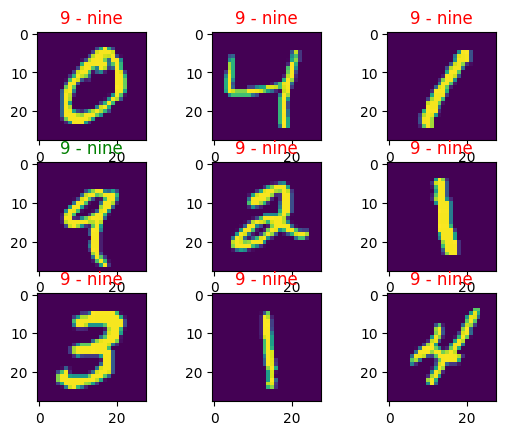

In [62]:
for i in range(10):
  image, label = train_data[i]
  visualize_image(image, label, predicted=9, index=i, nrows=3, ncols=3)

In [72]:
def make_predictions(model, data, device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())
  return torch.stack

In [73]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=16):
  test_samples.append(sample)
  test_labels.append(label)


In [75]:
predicted = make_predictions(model=model, data=test_samples, device=device)
predicted = predicted.argmax(dim=1)

<ipython-input-77-6f7f34fba970>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, index)


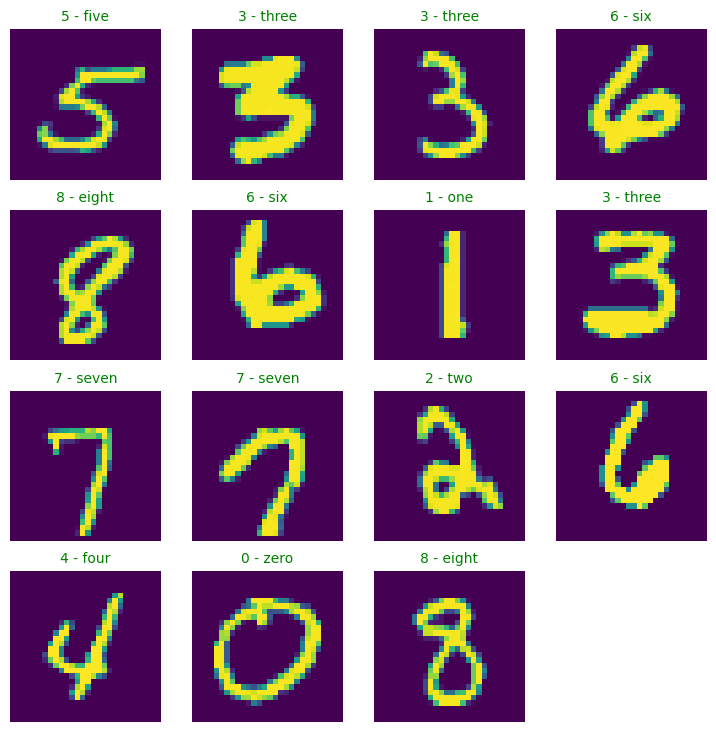

In [78]:
plt.figure(figsize=(9, 9))
nrows = 4
ncols = 4

for i, sample in enumerate(test_samples):
  visualize_image(image=sample, label=test_labels[i], predicted=predicted[i], index=i, nrows=nrows, ncols=ncols)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [79]:
!pip install -q torchmetrics -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.6 MB/s eta 0:00:00


In [80]:
from tqdm.auto import tqdm

y_preds = []
model.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions"):

    X, y = X.to(device), y.to(device)

    y_logit = model(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [91]:
target = []
for i in test_data:
  target.append(i[1])
target = torch.tensor(target)

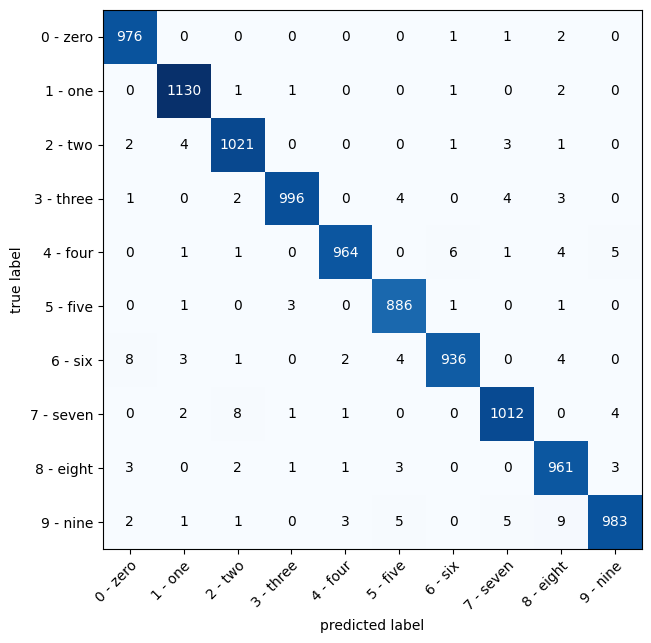

In [92]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=target)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [93]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor

tensor([[[[0.7025, 0.6790, 0.9155,  ..., 0.6431, 0.3908, 0.6947],
          [0.0897, 0.8712, 0.1330,  ..., 0.9211, 0.6948, 0.4751],
          [0.1985, 0.1941, 0.0521,  ..., 0.4295, 0.4961, 0.3849],
          ...,
          [0.6637, 0.6805, 0.6573,  ..., 0.4031, 0.8267, 0.8265],
          [0.7226, 0.3780, 0.9343,  ..., 0.0987, 0.0321, 0.5937],
          [0.3192, 0.2697, 0.9760,  ..., 0.4400, 0.3761, 0.0013]],

         [[0.2148, 0.1357, 0.6344,  ..., 0.5163, 0.7455, 0.3668],
          [0.3597, 0.8986, 0.1169,  ..., 0.0318, 0.2344, 0.8133],
          [0.5113, 0.4830, 0.5510,  ..., 0.4370, 0.5374, 0.4965],
          ...,
          [0.9890, 0.9186, 0.8131,  ..., 0.8031, 0.5805, 0.0283],
          [0.8545, 0.1798, 0.7316,  ..., 0.1580, 0.2489, 0.3252],
          [0.4092, 0.7097, 0.1053,  ..., 0.2302, 0.7103, 0.9261]],

         [[0.2458, 0.1583, 0.8723,  ..., 0.5139, 0.7863, 0.5166],
          [0.8143, 0.3111, 0.8921,  ..., 0.8426, 0.7276, 0.4166],
          [0.9659, 0.9791, 0.9062,  ..., 0

In [97]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=5,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 31, 31])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [109]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

train_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [110]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(938, 157)

In [111]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

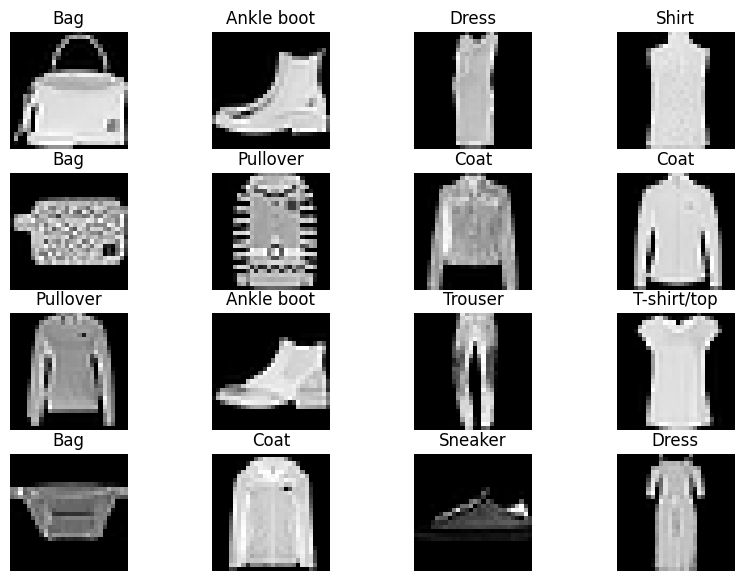

In [112]:
nrows, ncols = 4, 4

plt.figure(figsize=(10, 7))
for i in range(1, nrows * ncols + 1):
  random_idx = torch.randint(1, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  plt.subplot(nrows, ncols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [113]:
model_1 = MNISTModelV0(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)
model_1

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [114]:

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ---------------")

  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      optimizer=optimizer,
      device=device
  )

  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 
 ---------------
Train Loss: 2.303 | Train Accuracy: 9.998%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 1 
 ---------------
Train Loss: 2.303 | Train Accuracy: 9.998%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 2 
 ---------------
Train Loss: 2.303 | Train Accuracy: 10.001%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 3 
 ---------------
Train Loss: 2.303 | Train Accuracy: 10.000%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 4 
 ---------------
Train Loss: 2.303 | Train Accuracy: 10.005%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 5 
 ---------------
Train Loss: 2.303 | Train Accuracy: 10.000%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 6 
 ---------------
Train Loss: 2.303 | Train Accuracy: 10.001%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 7 
 ---------------
Train Loss: 2.303 | Train Accuracy: 9.998%
Test Loss:  2.303 | Test Accuracy: 9.982%
Epoch: 8 
 ---------------
Train Loss: 2.303 | Train Accuracy: 9.996%
Test Loss:  2.303 | Test Accu